# Data Exploration

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
print(df_train.info())
print(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51490 entries, 0 to 51489
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Report Number                   51490 non-null  object 
 1   Local Case Number               45037 non-null  object 
 2   Agency Name                     51490 non-null  object 
 3   ACRS Report Type                51490 non-null  object 
 4   Crash Date/Time                 51490 non-null  object 
 5   Route Type                      46522 non-null  object 
 6   Road Name                       46988 non-null  object 
 7   Cross-Street Type               46471 non-null  object 
 8   Cross-Street Name               46968 non-null  object 
 9   Off-Road Description            6950 non-null   object 
 10  Municipality                    7567 non-null   object 
 11  Related Non-Motorist            3648 non-null   object 
 12  Collision Type                  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Cleaning and Preprocessing

Dates weren't recorded in a format understood by matplotlib so change it to pandas.to_datetime function.

In [141]:
df_train["Crash Date/Time"] = pd.to_datetime(df_train["Crash Date/Time"])
df_train.set_index('Crash Date/Time', inplace=True)
df_train.sort_index(inplace=True)

df_test["Crash Date/Time"] = pd.to_datetime(df_test["Crash Date/Time"])
df_test.set_index('Crash Date/Time', inplace=True)
df_test.sort_index(inplace=True)

Many of the columns have null values. We will look at the fraction of NA values in the columns in descending order.

In [142]:
df_train.isna().sum().sort_values(ascending=False)/len(df_train)

Non-Motorist Substance Abuse      0.934279
Related Non-Motorist              0.929151
Off-Road Description              0.865022
Municipality                      0.853039
Circumstance                      0.771762
Equipment Problems                0.207147
Driver Substance Abuse            0.176636
Traffic Control                   0.150981
Local Case Number                 0.125325
Surface Condition                 0.114178
Cross-Street Type                 0.097475
Route Type                        0.096485
Cross-Street Name                 0.087823
Road Name                         0.087434
Weather                           0.078248
Drivers License State             0.049097
Vehicle Continuing Dir            0.021927
Vehicle Going Dir                 0.021616
Vehicle Body Type                 0.015246
Light                             0.013673
Vehicle Damage Extent             0.007710
Collision Type                    0.005807
Vehicle Second Impact Location    0.004545
Vehicle Fir

We are going to drop the columns which have more than 75% NA values in them

In [143]:
df_train.drop(columns=['Off-Road Description', 'Municipality', 
                       'Related Non-Motorist', 'Circumstance', 
                       'Non-Motorist Substance Abuse'], axis=1, inplace=True)

In [144]:
df_test.drop(columns=['Off-Road Description', 'Municipality', 
                      'Related Non-Motorist', 'Circumstance', 
                      'Non-Motorist Substance Abuse'], axis=1, inplace=True)

Next we will replace some values with nan values which are common throughout the dataset and may indicate missing data. 

In [145]:
df_train.replace(['UNKNOWN','Unknown','OTHER'], np.nan, inplace=True)

In [146]:
df_test.replace(['UNKNOWN','Unknown','OTHER'], np.nan, inplace=True)

[Text(0.5, 1.0, 'Accidents by Speed Limit')]

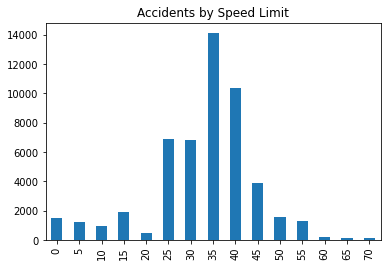

In [147]:
df_train['Speed Limit'].value_counts().sort_index().plot.bar().set(title='Accidents by Speed Limit')

In [148]:
df_train.isna().sum().sort_values(ascending=False)/len(df_train)

Equipment Problems                0.292542
Driver Substance Abuse            0.246650
Cross-Street Type                 0.174345
Traffic Control                   0.171664
Surface Condition                 0.125520
Local Case Number                 0.125325
Collision Type                    0.117926
Route Type                        0.100563
Weather                           0.090911
Cross-Street Name                 0.087823
Road Name                         0.087434
Vehicle Continuing Dir            0.060303
Vehicle Going Dir                 0.056535
Vehicle Damage Extent             0.053875
Drivers License State             0.049097
Vehicle Body Type                 0.033754
Light                             0.030278
Driverless Vehicle                0.027015
Vehicle Movement                  0.025830
Vehicle Second Impact Location    0.021985
Vehicle First Impact Location     0.021635
Vehicle Model                     0.019849
Vehicle Make                      0.019013
ACRS Report

In [149]:
df_test.isna().sum().sort_values(ascending=False)/len(df_train)

Equipment Problems                0.433929
Driver Substance Abuse            0.371548
Cross-Street Type                 0.259079
Traffic Control                   0.253408
Local Case Number                 0.195630
Surface Condition                 0.181608
Collision Type                    0.173373
Route Type                        0.145252
Cross-Street Name                 0.137328
Road Name                         0.137289
Weather                           0.125189
Drivers License State             0.076131
Vehicle Continuing Dir            0.070732
Vehicle Going Dir                 0.065935
Vehicle Damage Extent             0.056671
Vehicle Body Type                 0.044630
Vehicle Movement                  0.031424
Vehicle Model                     0.031191
Vehicle Make                      0.029559
Vehicle Second Impact Location    0.027054
Vehicle First Impact Location     0.026024
Light                             0.020023
Driverless Vehicle                0.005632
ACRS Report

* Replace NA values of corresponding columns with their MODE

In [150]:
for column in df_train.columns:
  df_train[column].fillna(df_train[column].mode()[0], inplace=True)

In [151]:
for column in df_test.columns:
  df_test[column].fillna(df_test[column].mode()[0], inplace=True)

As we can see all NA values are replaced

Now let's drop all the columns which are having -  
* Either only one unique value
* Mostly all unique values


In [152]:
df_train.drop([
         'Driverless Vehicle', 'Report Number', 'Local Case Number', 'Cross-Street Type',
         'Cross-Street Name', 'Person ID', 'Vehicle ID', 'Vehicle Continuing Dir', 
         'Vehicle Going Dir', 'Road Name', 'Drivers License State', 'Parked Vehicle',
         'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Route Type',
         'Vehicle Make', 'Agency Name', 'Vehicle Model'], axis=1, inplace=True)

In [153]:
df_test.drop([
         'Driverless Vehicle', 'Report Number', 'Local Case Number', 'Cross-Street Type',
         'Cross-Street Name', 'Person ID', 'Vehicle ID', 'Vehicle Continuing Dir', 
         'Vehicle Going Dir', 'Road Name', 'Drivers License State', 'Parked Vehicle',
         'Vehicle First Impact Location', 'Vehicle Second Impact Location', 'Route Type',
         'Vehicle Make', 'Vehicle Model', 'Agency Name'], axis=1, inplace=True)

In [154]:
test_id = df_test['Id']

In [155]:
df_test.drop(['Id'], axis=1, inplace=True)

In [156]:
df_test.columns

Index(['ACRS Report Type', 'Collision Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Injury Severity',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Speed Limit', 'Vehicle Year', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [157]:
print(len(df_train.columns))
print(len(df_test.columns))

18
17


In [158]:
df_train.drop(['Location'], axis=1, inplace=True)
df_test.drop(['Location'], axis=1, inplace=True)

Use Target and One-hot Encoding for categorical columns

Check number of unique values column-wise

In [159]:
for column in df_train.select_dtypes(include='object').columns:
  print("%-30s - %3d\n" % (column, df_train[column].nunique()))

ACRS Report Type               -   3

Collision Type                 -  16

Weather                        -  10

Surface Condition              -   9

Light                          -   6

Traffic Control                -   9

Driver Substance Abuse         -   9

Injury Severity                -   5

Vehicle Damage Extent          -   5

Vehicle Body Type              -  28

Vehicle Movement               -  20

Equipment Problems             -   6



Finding the percentage of each unique values for every column in Pandas and
group insignificant unique values together into a single value

ACRS Report Type

In [160]:
uniq_val = df_train['ACRS Report Type'].value_counts(normalize=True).to_frame()*100
uniq_val

,ACRS Report Type
Property Damage Crash,61.487668
Injury Crash,36.857642
Fatal Crash,1.654690


In [161]:
df_train['ACRS Report Type'].replace(uniq_val[uniq_val['ACRS Report Type'] < 60.0].index,'OTHERS',inplace=True)
df_train['ACRS Report Type'].value_counts(normalize=True).to_frame()*100

,ACRS Report Type
Property Damage Crash,61.487668
OTHERS,38.512332


Collision Type

In [162]:
uniq_val = df_train['Collision Type'].value_counts(normalize=True).to_frame()*100
uniq_val[uniq_val['Collision Type'] < 5.0].index

Index(['HEAD ON', 'SAME DIRECTION LEFT TURN', 'SAME DIRECTION RIGHT TURN',
       'OPPOSITE DIRECTION SIDESWIPE', 'ANGLE MEETS LEFT TURN',
       'ANGLE MEETS RIGHT TURN', 'SAME DIR REND LEFT TURN',
       'ANGLE MEETS LEFT HEAD ON', 'SAME DIR REND RIGHT TURN',
       'SAME DIR BOTH LEFT TURN', 'OPPOSITE DIR BOTH LEFT TURN'],
      dtype='object')

In [163]:
df_train['Collision Type'].replace(uniq_val[uniq_val['Collision Type'] < 5.0].index,'OTHERS',inplace=True)

In [164]:
df_train['Collision Type'].value_counts(normalize=True).to_frame()*100

,Collision Type
SAME DIR REAR END,44.286269
STRAIGHT MOVEMENT ANGLE,16.616819
OTHERS,13.866770
SINGLE VEHICLE,9.161002
SAME DIRECTION SIDESWIPE,8.582249
HEAD ON LEFT TURN,7.486891


Weather

In [165]:
uniq_val = df_train['Weather'].value_counts(normalize=True).to_frame()*100
uniq_val[uniq_val['Weather'] < 10.0].index

Index(['SNOW', 'FOGGY', 'WINTRY MIX', 'SLEET', 'SEVERE WINDS', 'BLOWING SNOW',
       'BLOWING SAND, SOIL, DIRT'],
      dtype='object')

In [166]:
df_train['Weather'].replace(uniq_val[uniq_val['Weather'] < 10.0].index,'OTHERS',inplace=True)

In [167]:
df_train['Weather'].value_counts(normalize=True).to_frame()*100

,Weather
CLEAR,73.402602
RAINING,11.988736
CLOUDY,10.279666
OTHERS,4.328996


Surface Condition

In [168]:
uniq_val = df_train['Surface Condition'].value_counts(normalize=True).to_frame()*100

In [169]:
uniq_val

,Surface Condition
DRY,78.966790
WET,16.688677
ICE,1.029326
SNOW,1.025442
SLUSH,0.545737
WATER(STANDING/MOVING),0.489415
"MUD, DIRT, GRAVEL",0.438920
OIL,0.431152
SAND,0.384541


In [170]:
df_train['Surface Condition'].replace(uniq_val[uniq_val['Surface Condition'] < 15.0].index,'OTHERS',inplace=True)
df_train['Surface Condition'].value_counts(normalize=True).to_frame()*100

,Surface Condition
DRY,78.966790
WET,16.688677
OTHERS,4.344533


Light

In [171]:
uniq_val = df_train['Light'].value_counts(normalize=True).to_frame()*100
uniq_val

,Light
DAYLIGHT,68.316178
DARK LIGHTS ON,21.798407
DARK NO LIGHTS,3.332686
DUSK,2.767528
DAWN,2.373276
DARK -- UNKNOWN LIGHTING,1.411925


In [172]:
df_train['Light'].replace(uniq_val[uniq_val['Light'] < 20.0].index,'OTHERS',inplace=True)
df_train['Light'].value_counts(normalize=True).to_frame()*100

,Light
DAYLIGHT,68.316178
DARK LIGHTS ON,21.798407
OTHERS,9.885415


Traffic Control

In [173]:
uniq_val = df_train['Traffic Control'].value_counts(normalize=True).to_frame()*100
uniq_val

,Traffic Control
NO CONTROLS,55.284521
TRAFFIC SIGNAL,32.522820
STOP SIGN,7.323752
FLASHING TRAFFIC SIGNAL,1.512915
YIELD SIGN,1.479899
PERSON,0.563216
WARNING SIGN,0.503010
RAILWAY CROSSING DEVICE,0.411730
SCHOOL ZONE SIGN DEVICE,0.398136


In [174]:
df_train['Traffic Control'].replace(uniq_val[uniq_val['Traffic Control'] < 7.0].index,'OTHERS',inplace=True)
df_train['Traffic Control'].value_counts(normalize=True).to_frame()*100

,Traffic Control
NO CONTROLS,55.284521
TRAFFIC SIGNAL,32.522820
STOP SIGN,7.323752
OTHERS,4.868907


Driver Substance Abuse

In [175]:
uniq_val = df_train['Driver Substance Abuse'].value_counts(normalize=True).to_frame()*100
uniq_val

,Driver Substance Abuse
NONE DETECTED,93.268596
ALCOHOL PRESENT,2.724801
ALCOHOL CONTRIBUTED,1.184696
ILLEGAL DRUG PRESENT,0.569043
MEDICATION PRESENT,0.506895
MEDICATION CONTRIBUTED,0.448631
ILLEGAL DRUG CONTRIBUTED,0.448631
COMBINATION CONTRIBUTED,0.435036
COMBINED SUBSTANCE PRESENT,0.413673


In [176]:
df_train['Driver Substance Abuse'].replace(uniq_val[uniq_val['Driver Substance Abuse'] < 93.0].index,'OTHERS',inplace=True)
df_train['Driver Substance Abuse'].value_counts(normalize=True).to_frame()*100

,Driver Substance Abuse
NONE DETECTED,93.268596
OTHERS,6.731404


Injury Severity

In [177]:
uniq_val = df_train['Injury Severity'].value_counts(normalize=True).to_frame()*100
uniq_val

,Injury Severity
NO APPARENT INJURY,78.677413
POSSIBLE INJURY,10.769081
SUSPECTED MINOR INJURY,7.754904
SUSPECTED SERIOUS INJURY,1.775102
FATAL INJURY,1.023500


In [178]:
df_train['Injury Severity'].replace(uniq_val[uniq_val['Injury Severity'] < 7.0].index,'OTHERS',inplace=True)
df_train['Injury Severity'].value_counts(normalize=True).to_frame()*100

,Injury Severity
NO APPARENT INJURY,78.677413
POSSIBLE INJURY,10.769081
SUSPECTED MINOR INJURY,7.754904
OTHERS,2.798602


Vehicle Body Type

In [179]:
uniq_val = df_train['Vehicle Body Type'].value_counts(normalize=True).to_frame()*100
uniq_val

,Vehicle Body Type
PASSENGER CAR,69.722276
(SPORT) UTILITY VEHICLE,8.725966
PICKUP TRUCK,4.000777
VAN,2.856865
TRANSIT BUS,2.182948
SCHOOL BUS,1.687706
POLICE VEHICLE/NON EMERGENCY,1.299281
"OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)",1.221596
"CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))",1.165275
POLICE VEHICLE/EMERGENCY,1.081763


In [180]:
df_train['Vehicle Body Type'].replace(uniq_val[uniq_val['Vehicle Body Type'] < 3.0].index,'OTHERS',inplace=True)
df_train['Vehicle Body Type'].value_counts(normalize=True).to_frame()*100

,Vehicle Body Type
PASSENGER CAR,69.722276
OTHERS,17.550981
(SPORT) UTILITY VEHICLE,8.725966
PICKUP TRUCK,4.000777


Vehicle Movement

In [181]:
uniq_val = df_train['Vehicle Movement'].value_counts(normalize=True).to_frame()*100
uniq_val

,Vehicle Movement
MOVING CONSTANT SPEED,39.256166
SLOWING OR STOPPING,14.731016
STOPPED IN TRAFFIC LANE,10.831229
MAKING LEFT TURN,9.122160
ACCELERATING,5.538940
BACKING,3.408429
MAKING RIGHT TURN,3.161779
STARTING FROM LANE,2.748106
CHANGING LANES,2.722859
PARKED,1.652748


In [182]:
df_train['Vehicle Movement'].replace(uniq_val[uniq_val['Vehicle Movement'] < 5.0].index,'OTHERS',inplace=True)
df_train['Vehicle Movement'].value_counts(normalize=True).to_frame()*100

,Vehicle Movement
MOVING CONSTANT SPEED,39.256166
OTHERS,20.520489
SLOWING OR STOPPING,14.731016
STOPPED IN TRAFFIC LANE,10.831229
MAKING LEFT TURN,9.122160
ACCELERATING,5.538940


Equipment Problems

In [183]:
uniq_val = df_train['Equipment Problems'].value_counts(normalize=True).to_frame()*100
uniq_val

,Equipment Problems
NO MISUSE,97.308215
AIR BAG FAILED,0.611769
BELT(S) MISUSED,0.555448
BELTS/ANCHORS BROKE,0.514663
FACING WRONG WAY,0.512721
STRAP/TETHER LOOSE,0.497184


In [184]:
df_train['Equipment Problems'].replace(uniq_val[uniq_val['Equipment Problems'] < 97.0].index,'OTHERS',inplace=True)
df_train['Equipment Problems'].value_counts(normalize=True).to_frame()*100

,Equipment Problems
NO MISUSE,97.308215
OTHERS,2.691785


Re-check unique values of object type columns after Data cleaning

In [185]:
for column in df_train.select_dtypes(include='object').columns:
  print("%-30s - %3d\n" % (column, df_train[column].nunique()))

ACRS Report Type               -   2

Collision Type                 -   6

Weather                        -   4

Surface Condition              -   3

Light                          -   3

Traffic Control                -   4

Driver Substance Abuse         -   2

Injury Severity                -   4

Vehicle Damage Extent          -   5

Vehicle Body Type              -   4

Vehicle Movement               -   6

Equipment Problems             -   2



In [186]:
print(df_train.shape)
print(df_test.shape)
df_train.select_dtypes(include='object').columns

(51490, 17)
(77235, 16)


Index(['ACRS Report Type', 'Collision Type', 'Weather', 'Surface Condition',
       'Light', 'Traffic Control', 'Driver Substance Abuse', 'Injury Severity',
       'Vehicle Damage Extent', 'Vehicle Body Type', 'Vehicle Movement',
       'Equipment Problems'],
      dtype='object')

Clean Test data

In [187]:
def clean_cat_cols(col_name, perc, gt_lt):
  uniq_val = df_test[col_name].value_counts(normalize=True).to_frame()*100
  if gt_lt == '<':
    cond = uniq_val[uniq_val[col_name] < perc].index
  else:
    cond = uniq_val[uniq_val[col_name] > perc].index
  df_test[col_name].replace(cond,'OTHERS',inplace=True)

In [188]:
clean_cat_cols('ACRS Report Type', 60.0, '<')
clean_cat_cols('Collision Type', 5.0, '<')
clean_cat_cols('Weather', 10.0, '<')
clean_cat_cols('Surface Condition', 15.0, '<')
clean_cat_cols('Light', 20.0, '<')
clean_cat_cols('Traffic Control', 7.0, '<')
clean_cat_cols('Driver Substance Abuse', 93.0, '<')
clean_cat_cols('Injury Severity', 7.0, '<')
clean_cat_cols('Vehicle Body Type', 3.0, '<')
clean_cat_cols('Vehicle Movement', 5.0, '<')
clean_cat_cols('Equipment Problems', 97.0, '<')

In [189]:
df_train

,ACRS Report Type,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Injury Severity,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Speed Limit,Vehicle Year,Equipment Problems,Latitude,Longitude,Fault
Crash Date/Time,,,,,,,,,,,,,,,,,
2015-01-01 00:30:00,Property Damage Crash,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NO APPARENT INJURY,FUNCTIONAL,PASSENGER CAR,OTHERS,35,1993,NO MISUSE,39.022001,-77.102673,0
2015-01-01 01:10:00,OTHERS,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NO APPARENT INJURY,FUNCTIONAL,(SPORT) UTILITY VEHICLE,MAKING LEFT TURN,40,1987,NO MISUSE,39.196610,-77.265547,0
2015-01-01 01:14:00,OTHERS,OTHERS,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,OTHERS,NO APPARENT INJURY,DISABLING,PICKUP TRUCK,MOVING CONSTANT SPEED,40,1999,NO MISUSE,39.096217,-77.109803,1
2015-01-01 01:14:00,OTHERS,OTHERS,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,SUSPECTED MINOR INJURY,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,35,2002,NO MISUSE,39.096217,-77.155942,0
2015-01-01 01:26:00,Property Damage Crash,OTHERS,CLEAR,DRY,DARK LIGHTS ON,TRAFFIC SIGNAL,NONE DETECTED,NO APPARENT INJURY,FUNCTIONAL,PASSENGER CAR,MAKING LEFT TURN,35,1998,NO MISUSE,39.158059,-77.204349,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 18:50:00,Property Damage Crash,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,OTHERS,NONE DETECTED,NO APPARENT INJURY,FUNCTIONAL,PASSENGER CAR,STOPPED IN TRAFFIC LANE,40,2020,NO MISUSE,39.122231,-77.177870,0
2021-10-27 19:53:00,Property Damage Crash,SINGLE VEHICLE,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NO APPARENT INJURY,DISABLING,PASSENGER CAR,MOVING CONSTANT SPEED,35,2008,NO MISUSE,39.065462,-77.074375,1
2021-10-27 20:34:00,OTHERS,SAME DIR REAR END,CLEAR,DRY,DARK LIGHTS ON,NO CONTROLS,NONE DETECTED,NO APPARENT INJURY,DISABLING,(SPORT) UTILITY VEHICLE,OTHERS,25,2000,NO MISUSE,39.101723,-77.160020,1


# Prediction

In [190]:
dummies = ['ACRS Report Type', 'Surface Condition', 'Light',  
           'Driver Substance Abuse', 'Injury Severity', 'Equipment Problems', 
           'Weather', 'Vehicle Damage Extent', 'Traffic Control', 
           'Vehicle Body Type', 'Vehicle Movement', 'Collision Type']

col_names = df_train.select_dtypes(include='object').columns
df_train_Hotenc = pd.get_dummies(df_train, columns=col_names, drop_first=True)
df_test_Hotenc = pd.get_dummies(df_test, columns=col_names, drop_first=True)


In [191]:
print(df_train_Hotenc.shape)
print(df_test_Hotenc.shape)

(51490, 38)
(77235, 37)


In [192]:
X_hotenc_train, y_hotenc_train = df_train_Hotenc.drop(['Fault'], axis=1), df_train_Hotenc.Fault

In [193]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

Scale non-object columns

In [194]:
X_hotenc_train[['Speed Limit','Vehicle Year','Latitude','Longitude']] = min_max_scaler.fit_transform(X_hotenc_train[['Speed Limit','Vehicle Year','Latitude','Longitude']])
df_test_Hotenc[['Speed Limit','Vehicle Year','Latitude','Longitude']] = min_max_scaler.fit_transform(df_test_Hotenc[['Speed Limit','Vehicle Year','Latitude','Longitude']])

In [195]:
X_hotenc_train

,Speed Limit,Vehicle Year,Latitude,Longitude,ACRS Report Type_Property Damage Crash,Collision Type_OTHERS,Collision Type_SAME DIR REAR END,Collision Type_SAME DIRECTION SIDESWIPE,Collision Type_SINGLE VEHICLE,Collision Type_STRAIGHT MOVEMENT ANGLE,Weather_CLOUDY,Weather_OTHERS,Weather_RAINING,Surface Condition_OTHERS,Surface Condition_WET,Light_DAYLIGHT,Light_OTHERS,Traffic Control_OTHERS,Traffic Control_STOP SIGN,Traffic Control_TRAFFIC SIGNAL,Driver Substance Abuse_OTHERS,Injury Severity_OTHERS,Injury Severity_POSSIBLE INJURY,Injury Severity_SUSPECTED MINOR INJURY,Vehicle Damage Extent_DISABLING,Vehicle Damage Extent_FUNCTIONAL,Vehicle Damage Extent_NO DAMAGE,Vehicle Damage Extent_SUPERFICIAL,Vehicle Body Type_OTHERS,Vehicle Body Type_PASSENGER CAR,Vehicle Body Type_PICKUP TRUCK,Vehicle Movement_MAKING LEFT TURN,Vehicle Movement_MOVING CONSTANT SPEED,Vehicle Movement_OTHERS,Vehicle Movement_SLOWING OR STOPPING,Vehicle Movement_STOPPED IN TRAFFIC LANE,Equipment Problems_OTHERS
Crash Date/Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:30:00,0.500000,0.19932,0.511641,0.679001,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
2015-01-01 01:10:00,0.571429,0.19872,0.599755,0.632599,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2015-01-01 01:14:00,0.571429,0.19992,0.549093,0.676970,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2015-01-01 01:14:00,0.500000,0.20022,0.549093,0.663825,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0
2015-01-01 01:26:00,0.500000,0.19982,0.580300,0.650034,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27 18:50:00,0.571429,0.20202,0.562220,0.657578,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
2021-10-27 19:53:00,0.500000,0.20082,0.533572,0.687063,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
2021-10-27 20:34:00,0.357143,0.20002,0.551871,0.662663,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [196]:
import xgboost as xgb
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
              ('xgb', xgb.XGBClassifier(n_estimators=150, 
                                        learning_rate=0.1, 
                                        objective='binary:logistic'))
            ]
clf = StackingClassifier(
      estimators=estimators, final_estimator=LogisticRegression()
    )

In [197]:
clf.fit(X_hotenc_train, y_hotenc_train)
preds = clf.predict(df_test_Hotenc)

In [198]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['Fault'] = preds

In [199]:
submission.to_csv('STACK_oneHot_xgb_lr_clf.csv', index=False)

In [200]:
!pip install category_encoders

In [201]:
import category_encoders
from category_encoders import TargetEncoder
t_encoder = TargetEncoder()

In [202]:
X_tarenc_train, y_tarenc_train = df_train.drop(['Fault'], axis=1), df_train.Fault
X_tarenc_test = df_test

In [203]:
print(X_tarenc_train.shape)
print(X_tarenc_test.shape)

(51490, 16)
(77235, 16)


In [205]:
X_tarenc_train[['Speed Limit','Vehicle Year','Latitude','Longitude']] = min_max_scaler.fit_transform(X_tarenc_train[['Speed Limit','Vehicle Year','Latitude','Longitude']])
X_tarenc_test[['Speed Limit','Vehicle Year','Latitude','Longitude']] = min_max_scaler.fit_transform(X_tarenc_test[['Speed Limit','Vehicle Year','Latitude','Longitude']])

In [206]:
print(X_tarenc_train.shape)
print(y_tarenc_train.shape)
print(X_tarenc_test.shape)

(51490, 16)
(51490,)
(77235, 16)


In [207]:
t_encoder.fit(X_tarenc_train, y_tarenc_train)

TargetEncoder(cols=['ACRS Report Type', 'Collision Type', 'Weather',
                    'Surface Condition', 'Light', 'Traffic Control',
                    'Driver Substance Abuse', 'Injury Severity',
                    'Vehicle Damage Extent', 'Vehicle Body Type',
                    'Vehicle Movement', 'Equipment Problems'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [208]:
X_tarenc_train = t_encoder.transform(X_tarenc_train)
X_tarenc_test = t_encoder.transform(X_tarenc_test)

In [ ]:
clf.fit(X_tarenc_train, y_tarenc_train)
preds = clf.predict(X_tarenc_test)

In [ ]:
submission = pd.DataFrame()
submission['Id'] = test_id
submission['Fault'] = preds

In [ ]:
submission.to_csv('STACK_tarenc_xgb_lr_clf.csv', index=False)